In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys

# Precinct Shapefile
---

## VEST's Documentation File

Election results from Wyoming Secretary of State (https://soswy.state.wy.us/Elections/ElectionResults.aspx)
Precinct shapefile primarily from the U.S. Census Bureau's 2020 Redistricting Data Program final release. The Fremont County shapefile was provided by the Fremont County Assessor.
 
The following modifications were made to recreate the 2016 precinct boundaries.

Albany: Consolidate 8 county VTDs into 5 precincts, 18 city VTDs into 8 precincts \
Campbell: Split 05-01/24-01; Merge 01-27 into 05-01/19-01/24-01; Reverse 26-01 annexation \
Carbon: Remove district splits for 1-2, 5-1, 6-1, 7-1, 11-2, 12-1, 13-1 \
Goshen: Align VTDs with legislative districts and 2012 redistricting map \
Laramie: Adjust 03-05, 03-06, 03-07, 03-10 to reverse Cheyenne annexations \
Platte: Merge Y-O Ranch into Wheatland Rural \
Sheridan: Remove district splits for 01-01, 02-01, 02-03, 03-03, 11-03 \
Sweetwater: Align wards and precincts countywide with 2012 legislative redistricting \
Uinta: Remove 02-01 district split; Split 01-03/01-04; Merge 04-01/04-03 \
Weston: Adjust 5-2/5-3 boundary to match 2012 realignment

G16PRERTRU - Donald Trump (Republican Party) \
G16PREDCLI - Hillary Clinton (Democratic Party) \
G16PRELJOH - Gary Johnson (Libertarian Party) \
G16PRECCAS - Darrell L. Castle (Constitution Party) \
G16PREIFUE - Rocky De La Fuente (Independent) \
G16PREGSTE - Jill Stein (Green Party) \
G16PREOWRI - Write-in Votes

G16HALRCHE - Liz Cheney (Republican Party) \
G16HALDGRE - Ryan Greene (Democratic Party) \
G16HALLSTR - Lawrence Gerard Struempf (Libertarian Party) \
G16HALCCUM - Daniel Clyde Cummings (Constitution Party) \
G16HALOWRI - Write-in Votes

### Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw_from_source/VEST/wy_2016/wy_2016.shp")

In [3]:
vest_shp.shape

(483, 17)

In [4]:
vest_shp.head(1)

,STATEFP20,COUNTYFP20,VTDST20,NAME20,G16PRERTRU,G16PREDCLI,G16PRELJOH,G16PRECCAS,G16PREIFUE,G16PREGSTE,G16PREOWRI,G16HALRCHE,G16HALDGRE,G16HALLSTR,G16HALCCUM,G16HALOWRI,geometry
0,56,045,000101,NEWCASTLE RURAL OUTSIDE,574,47,14,3,2,1,6,447,119,26,46,0,"MULTIPOLYGON (((-104.22316 43.85669, -104.2231..."


<AxesSubplot:>

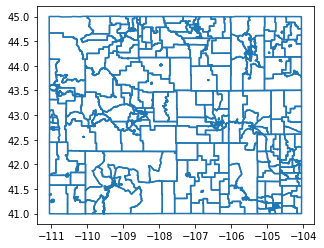

In [5]:
vest_shp.boundary.plot()

In [6]:
vest_shp.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'NAME20', 'G16PRERTRU',
       'G16PREDCLI', 'G16PRELJOH', 'G16PRECCAS', 'G16PREIFUE', 'G16PREGSTE',
       'G16PREOWRI', 'G16HALRCHE', 'G16HALDGRE', 'G16HALLSTR', 'G16HALCCUM',
       'G16HALOWRI', 'geometry'],
      dtype='object')

# Election Results

## Load Files

The SOS directed to this link for election results for the 2016 general: https://soswy.state.wy.us/Elections/ElectionResults.aspx

In [7]:
#Grab the folder 
loaded_counties = os.listdir("./raw_from_source/Election_Results/")

#Create a list to add the county data too
li = []

#Iterate over all the counties
for file in loaded_counties:
    #Just work on the county file
    if "County_General_PbP" in file: 
        #Create the file path
        file_string = "./raw_from_source/Election_Results/" + file
        #Import the file
        df = pd.read_excel(file_string, 'Sheet1', index_col = [0], header = [0,1]) 
        #Filter down columns (first level of multi-index)
        df = df[['United States President','United States President, Continued','United States Representative']]
        #Rename the columns to deal with the multi-index
        df.columns=['_'.join(col) if type(col) is tuple else col for col in df.columns.values]
        #Filter down columns
        df = df[['United States President_Donald J. Trump and\nMichael R. Pence (R) ','United States President_Hillary Clinton and\nTim Kaine (D)','United States President_Gary Johnson and\nBill Weld (L)','United States President_Darrell Castle and\nScott Bradley (C) ','United States President_"Rocky" Roque De La Fuente and\nMichael Steinberg (I)','United States President_Jill Stein and\nAjamu Baraka (I)','United States President, Continued_Write-Ins','United States Representative_Liz\nCheney (R) ','United States Representative_Ryan\nGreene (D)','United States Representative_Lawrence Gerard\nStruempf (L)','United States Representative_Daniel Clyde\nCummings (C) ','United States Representative_Write-Ins']]
        #Add the county
        df["County"] = file[5:len(file)-24]
        #Add the data to the list
        li.append(df)
        print("Working on "+ file)
#Create the final dataframe
final_results = pd.concat(li)

Working on 2016_Albany_County_General_PbP.xlsx
Working on 2016_Big_Horn_County_General_PbP.xlsx
Working on 2016_Campbell_County_General_PbP.xlsx
Working on 2016_Carbon_County_General_PbP.xlsx
Working on 2016_Converse_County_General_PbP.xlsx
Working on 2016_Crook_County_General_PbP.xlsx
Working on 2016_Fremont_County_General_PbP.xlsx
Working on 2016_Goshen_County_General_PbP.xlsx
Working on 2016_Hot_Springs_County_General_PbP.xlsx
Working on 2016_Johnson_County_General_PbP.xlsx
Working on 2016_Laramie_County_General_PbP.xlsx
Working on 2016_Lincoln_County_General_PbP.xlsx
Working on 2016_Natrona_County_General_PbP.xlsx
Working on 2016_Niobrara_County_General_PbP.xlsx
Working on 2016_Park_County_General_PbP.xlsx
Working on 2016_Platte_County_General_PbP.xlsx
Working on 2016_Sheridan_County_General_PbP.xlsx
Working on 2016_Sublette_County_General_PbP.xlsx
Working on 2016_Sweetwater_County_General_PbP.xlsx
Working on 2016_Teton_County_General_PbP.xlsx
Working on 2016_Uinta_County_General_P

### Clean Up the Election Results

In [8]:
#Deal with the index
final_results.reset_index(drop=False,inplace=True)

#Rename the columns to match VEST
final_results.columns = ["Precinct",'G16PRERTRU',
       'G16PREDCLI', 'G16PRELJOH', 'G16PRECCAS', 'G16PREIFUE', 'G16PREGSTE',
       'G16PREOWRI', 'G16HALRCHE', 'G16HALDGRE', 'G16HALLSTR', 'G16HALCCUM',
       'G16HALOWRI','County']

#Remove the rows with Total votes
final_results = final_results[final_results["Precinct"]!="Total"]

#Fill n/a values with 0
final_results = final_results.fillna(0)

### Check Statewide Candidate Totals

In [9]:
data_columns = ['G16PRERTRU',
       'G16PREDCLI', 'G16PRELJOH', 'G16PRECCAS', 'G16PREIFUE', 'G16PREGSTE',
       'G16PREOWRI', 'G16HALRCHE', 'G16HALDGRE', 'G16HALLSTR', 'G16HALCCUM',
       'G16HALOWRI']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- final_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-final_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(final_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(final_results[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G16PRERTRU is equal 	VEST: 174419 	RDH: 174419.0
G16PREDCLI is equal 	VEST: 55973 	RDH: 55973.0
G16PRELJOH is equal 	VEST: 13287 	RDH: 13287.0
G16PRECCAS is equal 	VEST: 2042 	RDH: 2042.0
G16PREIFUE is equal 	VEST: 709 	RDH: 709.0
G16PREGSTE is equal 	VEST: 2515 	RDH: 2515.0
G16PREOWRI is equal 	VEST: 6904 	RDH: 6904.0
G16HALRCHE is equal 	VEST: 156176 	RDH: 156176
G16HALDGRE is equal 	VEST: 75466 	RDH: 75466.0
G16HALLSTR is equal 	VEST: 9033 	RDH: 9033.0
G16HALCCUM is equal 	VEST: 10362 	RDH: 10362.0
G16HALOWRI is equal 	VEST: 739 	RDH: 739.0

All other races are equal


### Check County Totals

#### Add in County FIPs data

In [10]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw_from_source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Wyoming"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#Modify county names in dataframe to match the FIPs file
county_name_changes_dict = {"Big_Horn":"Big Horn",'Hot_Springs':"Hot Springs"}
final_results["County"] = final_results["County"].map(county_name_changes_dict).fillna(final_results["County"])

#Use the dictionary to go from a county name to a county FIPS
final_results["County"] = final_results["County"].map(fips_dict).fillna(final_results["County"])

#Check the number of counties - looking for 23
print(len(final_results["County"].unique()))

23


#### Check the Results

In [11]:
print("Counties with differences printed below:")
diff_counties=[]
for i in data_columns:
    diff = vest_shp.groupby(['COUNTYFP20']).sum()[i]-final_results.groupby(["County"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")


Counties with differences printed below:

All other races in all counties are equal


### Check Precinct Votes

#### Create a 'join_col' in Both Files

In [12]:
#Create a VEST join col
vest_shp["join_col"] = vest_shp["COUNTYFP20"]+"-"+vest_shp["NAME20"]+vest_shp["VTDST20"]
#Check to make sure it is unique
print(vest_shp["join_col"].value_counts(dropna=False))

#Create an election results join col
final_results["join_col"] = final_results["County"]+"-"+final_results["Precinct"]
#Check to make sure it is unique
print(final_results["join_col"].value_counts(dropna=False))

045-NEWCASTLE RURAL OUTSIDE000101    1
033-BETHESDA WORSHIP011-01           1
025-1-2000102                        1
025-2-6000206                        1
025-8-3000803                        1
                                    ..
021-2-12002-12                       1
021-2-13002-13                       1
021-2-11002-11                       1
021-3-12003-12                       1
021-7-30007-3                        1
Name: join_col, Length: 483, dtype: int64
001-Shields Street. Aux. Gym  13-1             1
031-Glendo West, Glendo Town Hall 6-1          1
029-Cody Recreation Center 3-2                 1
029-Cody Recreation Center 3-1                 1
029-Cody Auditorium 2-2                        1
                                              ..
015-Torrington Rendezvous Center 10-3          1
015-Torrington Rendezvous Center 10-2          1
015-Torrington Rendezvous Center 10-1          1
015-Fort Laramie Town Hall 9-1                 1
045-Newcastle - State Forestry Building

#### First Join Attempt
Note: Not expecting any to join because we added VTDST20 to the VEST ID.  
(added b/c that will be helpful to justify the name changes)

In [13]:
join_attempt_one = pd.merge(vest_shp,final_results,how="outer",on="join_col",indicator=True)
join_attempt_one["_merge"].value_counts()

left_only     483
right_only    482
both            0
Name: _merge, dtype: int64

#### Change Names to Perform Join

In [14]:
election_vest_id_changes_dict = {'001-National Guard Armory 14-1': '001-National Guard Armory 14-1001401', '001-Albany County Fairgrounds 46-11': '001-Albany County Fairgrounds 46-11004611', '001-Linford Elementary School 45-1': '001-Linford Elementary School 45-1004501', '001-Shields Street. Aux. Gym  13-1': '001-Shields Street. Aux. Gym 13-1001301', '001-New Laramie High School 46-2': '001-New Laramie High School 46-2004602', '001-Spring Creek Elementary School 13-3': '001-Spring Creek Elementary School 13-3001303', '001-Lincoln Community Center 45-2': '001-Lincoln Community Center 45-2004502', '001-New Laramie High School 46-1': '001-New Laramie High School 46-1004601', '001-Laramie Peak Fire Hall 14-11': '001-Laramie Peak Fire Hall 14-11001411', '001-Harmony School 46-12': '001-Harmony School 46-12004612', '001-Centennial School 46-13': '001-Centennial School 46-13004613', '001-Rock River Town Hall 47-11': '001-Rock River Town Hall 47-11004711', '001-Shields Street. Aux. Gym 13-2': '001-Shields Street. Aux. Gym 13-2001302', '003-Lovell-Community Center 20-1': '003-Lovell002001', '003-Greybull-Elks Lodge 11-1': '003-Greybull001101', '003-Basin-Fair Grounds 1-1': '003-Basin000101', '003-Cowley-Log Gym 22-1': '003-Cowley002201', '003-Byron-Town Complex 23-1': '003-Byron002301', '003-Burlington-Fire Hall 2-1': '003-Burlington000201', '003-Shell-Community Hall 16-1': '003-Shell001601', '003-Manderson-Town Hall 8-1': '003-Manderson000801', '003-Deaver-Community Hall 25-1': '003-Deaver002501', '003-Hayattville-Community Center 6-1': '003-Hyattville000601', '003-Frannie-Community Center 26-1': '003-Frannie002601', '003-Otto-Burlington Fire Hall 3-1': '003-Otto000301', '003-Emblem-Greybull Irrigation District Office 5-1': '003-Emblem000501', '005-Cam-Plex Wyoming Center 1-15': '005-01-15001-15', '005-Cam-Plex Wyoming Center 3-1': '005-03-01003-01', '005-Cam-Plex Wyoming Center 1-16': '005-01-16001-16', '005-Rozet School 4-1': '005-04-01004-01', '005-Cam-Plex Wyoming Center 1-23': '005-01-23001-23', '005-Cam-Plex Wyoming Center 5-1': '005-05-01005-01', '005-Cam-Plex Wyoming Center 1-12': '005-01-12001-12', '005-Cam-Plex Wyoming Center 1-9': '005-01-09001-09', '005-Cam-Plex Wyoming Center 1-7': '005-01-07001-07', '005-Cam-Plex Wyoming Center 1-5': '005-01-05001-05', '005-Wright Town Hall 14-1': '005-14-01014-01', '005-Cam-Plex Wyoming Center 1-19': '005-01-19001-19', '005-1st United Methodist Church 23-1': '005-23-01023-01', '005-Cam-Plex Wyoming Center 1-17': '005-01-17001-17', '005-Cam-Plex Wyoming Center 1-25': '005-01-25001-25', '005-Cam-Plex Wyoming Center 1-18': '005-01-18001-18', '005-Cam-Plex Wyoming Center 18-1': '005-18-01018-01', '005-Cam-Plex Wyoming Center 1-24': '005-01-24001-24', '005-Cam-Plex Wyoming Center 2-1': '005-02-01002-01', '005-Wright Town Hall 14-2': '005-14-02014-02', '005-Cam-Plex Wyoming Center 1-1': '005-01-01001-01', '005-Cam-Plex Wyoming Center 19-1': '005-19-01019-01', '005-Cam-Plex Wyoming Center 24-1': '005-24-01024-01', '005-Cam-Plex Wyoming Center 1-21': '005-01-21001-21', '005-Cam-Plex Wyoming Center 1-3': '005-01-03001-03', '005-Cam-Plex Wyoming Center 1-26': '005-01-26001-26', '005-Cam-Plex Wyoming Center 1-22': '005-01-22001-22', '005-Cam-Plex Wyoming Center 1-11': '005-01-11001-11', '005-Cam-Plex Wyoming Center 1-20': '005-01-20001-20', '005-Cam-Plex Wyoming Center 22-1': '005-22-01022-01', '005-Rawhide School 6-1': '005-06-01006-01', '005-Cam-Plex Wyoming Center 1-14': '005-01-14001-14', '005-4-J School 13-1': '005-13-01013-01', '005-Recluse Community Hall 7-1': '005-07-01007-01', '005-Little Powder School 8-1': '005-08-01008-01', '005-Cam-Plex Wyoming Center 9-1': '005-09-01009-01', '005-Cam-Plex Wyoming Center 26-1': '005-26-01026-01', '007-Platte Valley Community Center 11-1': '007-SARATOGA 11-10011-1', '007-Jeffrey Center 2-2': '007-RAWLINS 2-20002-2', '007-Jeffrey Center 2-1': '007-RAWLINS 2-10002-1', '007-Jeffrey Center 3-2': '007-RAWLINS 3-20003-2', '007-Platte Valley Community Center 11-2': '007-SARATOGA 11-2 OUTSIDE0011-2', '007-Valley Community Center 15-1': '007-BAGGS 15-10015-1', '007-Jeffrey Center 3-1': '007-RAWLINS 3-10003-1', '007-Hanna Town Hall 8-1': '007-HANNA 8-10008-1', '007-Jeffrey Center 1-1': '007-RAWLINS 1-10001-1', '007-Encampment Opera House 12-1': '007-ENCAMPMENT 12-1 OUTSIDE0012-1', '007-Encampment Opera House13-1': '007-RIVERSIDE 13-1 OUTSIDE0013-1', '007-Jeffrey Center 1-2': '007-RAWLINS 1-20001-2', '007-Sinclair Town Hall 5-1': '007-SINCLAIR 5-10005-1', '007-Medicine Bow Senior Center 7-1': '007-MEDICINE BOW 7-10007-1', '007-Elk Mountain Senior Center 9-1': '007-ELK MOUNTAIN 9-10009-1', '007-Valley Community Center 14-1': '007-DIXON/SAVERY 14-10014-1', '007-McFadden Fire Station 10-1': '007-MCFADDEN 10-10010-1', '007-Hanna Town Hall 6-1': '007-LEO 6-10006-1', '007-Jeffrey Center 4-1': '007-MUDDY GAP 4-10004-1', '009-Douglas Recreation Center 23-4': '009-COURTHOUSE0023-4', '009-Glenrock Recreation Center 9-1': '009-GLENROCK EAST0009-1', '009-Douglas Recreation Center 23-2': '009-NORTHWEST DOUGLAS0023-2', '009-Douglas Recreation Center 23-3': '009-SOUTHWEST DOUGLAS0023-3', '009-Douglas Recreation Center 4-4': '009-RURAL DOUGLAS0004-4', '009-Glenrock Recreation Center 9-2': '009-GLENROCK WEST0009-2', '009-Douglas Recreation Center 2-2': '009-ORIN0002-2', '009-Glenrock Recreation Center 10-10': '009-GLENROCK010-10', '009-Glenrock Recreation Center 6-6': '009-BOX ELDER0006-6', '009-Douglas Recreation Center 23-1': '009-NORTHEAST DOUGLAS0023-1', '009-Douglas Recreation Center 23-5': '009-SOUTH DOUGLAS0023-5', '009-Douglas Recreation Center 23-6': '009-FAIRVIEW0023-6', '009-Eastern Wyoming College 8-8': '009-EAST ANTELOPE0008-8', '009-Douglas Recreation Center 7-7': '009-LA PRELE0007-7', '009-Glenrock Recreation Center 11-11': '009-ROLLING HILLS011-11', '009-Eastern Wyoming College 3-1': '009-GUTHRIE0003-1', '009-Eastern Wyoming College 1-1': '009-LOST SPRINGS0001-1', '009-Douglas Recreation Center 20-20': '009-ORPHA020-20', '009-Dry Creek Hall 13-13': '009-DRY CREEK013-13', '011-Sundance Outside - Courthouse 2-2': '011-SUNDANCE OUTSIDE000202', '011-Elmore - Barton Ranch Voting Booth 12-12': '011-ELMORE001212', '011-Moorcroft Outside - Public Safety Bldg. 16-16': '011-MOORCROFT OUTSIDE001616', '011-Sundance Inside North - Courthouse 1-1': '011-SUNDANCE INSIDE NORTH000101', '011-Pine Haven Town Hall 15-15': '011-PINE HAVEN001515', '011-Sundance Inside South - Courthouse 1-2': '011-SUNDANCE INSIDE SOUTH000102', '011-Hulett Outside - Civic Center 13-13': '011-HULETT OUTSIDE001313', '011-Moorcroft East Side - Pubilc Safety Bldg. 18-2': '011-MOORCROFT EAST001802', '011-Tower Junction - Ram Center 11-11': '011-TOWER JUNCTION001111', '011-Aladdin Community Building  7-7': '011-ALADDIN000707', '011-Moorcroft West Side - Public Safety Bldg. 18-1': '011-MOORCROFT WEST001801', '011-Hulett Inside - Civic Center 14-14': '011-HULETT INSIDE001414', '011-Beulah Community Building 3-3': '011-BEULAH000303', '011-Alva Church 9-9': '011-ALVA000909', '011-Oshoto Community Building 26-26': '011-OSHOTO002626', '011-New Haven Community Building 23-23': '011-NEW HAVEN002323', '011-Colony Community Building 24-24': '011-COLONY002424', '013-Milford, Bob Carey Memorial FH 5-1': '013-MILFORD000501', '013-Dubois, Headwaters Comm.Center  7-1': '013-DUBOIS000701', '013-Big Bend, Fremont Ctr.- Fairgrounds 18-1': '013-BIG BEND001801', '013-Pavillion, Wind River Recreation Ctr. 14-1': '013-PAVILLION001401', '013-Riverton, Fremont Ctr.- Fairgrounds 3-6': '013-RIVERTON #6000306', '013-Riverton, Fremont Ctr.- Fairgrounds 3-3': '013-RIVERTON #3000303', '013-Defelder, Heritage Hall-Fairgrounds 10-1': '013-DELFELDER001001', '013-Riverton, Fremont Ctr.- Fairgrounds 3-5': '013-RIVERTON #5000305', '013-Lander, Bob Carey Memorial FH 1-1': '013-LANDER #1000101', '013-Riverton, Fremont Ctr.- Fairgrounds 3-4': '013-RIVERTON #4000304', '013-Lander, Bob Carey Memorial FH 1-5': '013-LANDER #5000105', '013-Riverton, Fremont Ctr.- Fairgrounds 3-1': '013-RIVERTON #1000301', '013-Riverton, Fremont Ctr- Fairgrounds 3-2': '013-RIVERTON #2000302', '013-Missouri Valley Fire Hall 9-1': '013-VALLEY000901', '013-Lander, Bob Carey Memorial FH 1-3': '013-LANDER #3000103', '013-Beebe, Bob Carey Memorial FH 6-1': '013-BEEBE000601', '013-Lander, Bob Carey Memorial FH 1-6': '013-LANDER #6000106', '013-Big Bend, Fremont Ctr.- Fairgrounds 18-2': '013-BIG BEND001802', '013-Shoshoni Senior Citizens Center 20-1': '013-SHOSHONI002001', '013-Lander, Bob Carey Memorial FH 1-4': '013-LANDER #4000104', '013-Reclamation, Heritage Hall - Fair 21-1': '013-RECLAMATION002101', '013-Hudson Town Hall 2-1': '013-HUDSON000201', '013-Lander, Bob Carey Memorial FH 1-2': '013-LANDER #2000102', '013-Luthy, Heritage Hall - Fairgrounds 17-1': '013-LUTHY001701', '013-Arapahoe School 8-1': '013-ARAPAHOE000801', '013-Morton, Kinnear Fire Hall 16-1': '013-MORTON001601', '013-Ethete, WY Indian High School 13-1': '013-ETHETE001301', '013-Crowheart Fire Hall 19-1': '013-CROWHEART001901', '013-Ft. Washakie School Admin. 4-1': '013-FORT WASHAKIE000401', '013-Jeffrey City Fire Hall 12-1': '013-JEFFREY CITY001201', '013-Lysite Fire Hall 22-1': '013-LYSITE002201', '013-Atlantic City Fire Hall 24-1': '013-ATLANTIC CITY002401', '015-Torrington Rendezvous Center 10-8': '015-TORRINGTON NORTH001008', '015-Torrington Rendezvous Center 10-9': '015-TORRINGTON WEST001009', '015-Lingle Town Hall 8-1': '015-LINGLE000801', '015-Torrington Rendezvous Center 10-4': '015-TORRINGTON #4001004', '015-Torrington Rendezvous Center 10-5': '015-TORRINGTON #5001005', '015-Torrington Rendezvous Center 10-6': '015-TORRINGTON #6001006', '015-La Grange Memorial Building 18-1': '015-LA GRANGE HD5001801', '015-Torrington Rendezvous Center 10-7': '015-TORRINGTON #7001007', '015-Torrington Rendezvous Center 10-2': '015-TORRINGTON #2001002', '015-Fort Laramie Town Hall 9-1': '015-FT LARAMIE000901', '015-Yoder Community Center 15-1': '015-YODER001501', '015-Huntley Table Mountain Vineyards 16-1': '015-HUNTLEY HD5001601', 
 '015-Veteran Legion Post #56 13-1': '015-VETERAN001301', '015-Torrington Rendezvous Center 10-10': '015-TORRINGTON SOUTH001010', '015-Torrington Rendezvous Center 10-1': '015-TORRINGTON #1001001', '015-Huntley Table Mountain Vineyards 16-2': '015-HUNTLEY HD10001602', '015-Jay Em 2-1': '015-JAY EM000201', '015-Hawk Springs Community Center 17-1': '015-HAWK SPRINGS HD5001701', '015-Torrington Rendezvous Center 10-3': '015-TORRINGTON #3001003', '015-Torrington Rendezvous Center 10-11': '015-TORRINGTON #11001011', '015-Prairie Center School 1-1': '015-MEYERS000101', '015-La Grange Memorial Building 18-3': '015-LA GRANGE HD10001803', '015-Iowa Center Jackson Home 20-1': '015-IOWA CENTER002001', '015-Hawk Springs Community Center 17-2': '015-HAWK SPRINGS HD10001702', '015-Torrington Rendezvous Center 10-12': '015-TORRINGTON EAST001012', '017-Armory 3-3': '017-HOT SPRINGS EAST000303', '017-1 Hot Springs Cnty Fair Bldg. 1-1': '017-THERMOPOLIS WEST000101', '017-2 Hot Springs Cnty Fair Bldg. 1-2': '017-THERMOPOLIS EAST000102', '017-Hot Springs County Museum 2-4': '017-HOT SPRINGS WEST000204', '019-Bomber Mtn. Civic Center  4-8': '019-Soldiers Home0004-8', '019-Catholic Rec Hall 4-7': '019-Oliver0004-7', '019-Catholic Rec Hall 3-1': '019-Northwest Buffalo0003-1', '019-Bomber Mtn.Civic Center 3-4': '019-Southwest Central Bu0003-4', '019-Catholic Rec Hall 3-8': '019-West Buffalo0003-8', '019-Harold Jarrard Park 8-11': '019-Middle Fork008-11', '019-Catholic Rec Hall 3-2': '019-West Central Buffalo0003-2', '019-Bomber Mtn.Civic Center 3-7': '019-Southwest Buffalo0003-7', '019-Catholic Rec Hall 3-3': '019-Northeast Buffalo0003-3', '019-Bomber Mtn. Civic Center 3-6': '019-Southeast Buffalo0003-6', '019-Bomber Mtn. Civic Center  2-14': '019-Piney-Shell002-14', '019-Bomber Mtn.Civic Center 3-5': '019-East Buffalo0003-5', '019-Harold Jarrard Park 6-10': '019-City of Kaycee006-10', '019-Harold Jarrard Park 9-12': '019-Sussex/Linch009-12', '019-Bomber Mtn. Civic Center  5-9': '019-Billy Creek0005-9', '019-Bomber Mtn.Civic Center 10-15': '019-Tipperary010-15', '021-5-4': '021-5-40005-4', '021-4-6': '021-4-60004-6', '021-2-6': '021-2-60002-6', '021-5-3': '021-5-30005-3', '021-1-1': '021-1-10001-1', '021-3-9': '021-3-90003-9', '021-4-9': '021-4-90004-9', '021-5-2': '021-5-20005-2', '021-6-1': '021-6-10006-1', '021-2-7': '021-2-70002-7', '021-4-7': '021-4-70004-7', '021-6-2': '021-6-20006-2', '021-6-3': '021-6-30006-3', '021-2-5': '021-2-50002-5', '021-3-5': '021-3-50003-5', '021-2-3': '021-2-30002-3', '021-2-12': '021-2-12002-12', '021-2-13': '021-2-13002-13', '021-3-6': '021-3-60003-6', '021-4-2': '021-4-20004-2', '021-4-8': '021-4-80004-8', '021-3-13': '021-3-13003-13', '021-2-2': '021-2-20002-2', '021-4-4': '021-4-40004-4', '021-3-1': '021-3-10003-1', '021-3-10': '021-3-10003-10', '021-3-8': '021-3-80003-8', '021-2-11': '021-2-11002-11', '021-3-12': '021-3-12003-12', '021-1-2': '021-1-20001-2', '021-1-8': '021-1-80001-8', '021-3-7': '021-3-70003-7', '021-5-1': '021-5-10005-1', '021-2-9': '021-2-90002-9', '021-1-3': '021-1-30001-3', '021-3-4': '021-3-40003-4', '021-1-6': '021-1-60001-6', '021-2-4': '021-2-40002-4', '021-1-5': '021-1-50001-5', '021-1-10': '021-1-10001-10', '021-1-9': '021-1-90001-9', '021-3-2': '021-3-20003-2', '021-2-1': '021-2-10002-1', '021-3-3': '021-3-30003-3', '021-7-4': '021-7-40007-4', '021-1-4': '021-1-40001-4', '021-1-7': '021-1-70001-7', '021-4-10': '021-4-10004-10', '021-6-5': '021-6-50006-5', '021-2-10': '021-2-10002-10', '021-5-5': '021-5-50005-5', '021-3-11': '021-3-11003-11', '021-7-3': '021-7-30007-3', '021-2-8': '021-2-80002-8', '021-6-4': '021-6-40006-4', '021-4-1': '021-4-10004-1', '021-4-5': '021-4-50004-5', '021-4-11': '021-4-11004-11', '021-7-1': '021-7-10007-1', '021-4-3': '021-4-30004-3', '021-7-2': '021-7-20007-2', '023-Afton Civic Center 2-7': '023-OSMOND-FAIRVIEW-SMOOT NO. 7000207', '023-Star Valley Ranch Town Hall 2-10': '023-STAR VALLEY RANCHES NO. 10000210', '023-Afton Civic Center 2-1': '023-AFTON NO. 1000201', '023-Star Valley Comm. Complex 2-5': '023-ETNA-FREEDOM NO. 5000205', '023-Alpine Civic Center 2-3': '023-ALPINE NO. 3000203', '023-Thayne Town Hall 2-8': '023-THAYNE NO. 8000208', '023-Afton Civic Center 2-6': '023-GROVER-AUBURN NO. 6000206', '023-South Lincoln Training  Ctr. 1-3': '023-KEMMERER NO. 3000103', '023-Bedford Water & Sewer Bldg. 2-4': '023-BEDFORD NO. 4000204', '023-LaBarge Town Hall 1-8': '023-LABARGE-FONTENELLE NO. 8000108', '023-Cokeville Town Hall 2-9': '023-COKEVILLE NO. 9000209', '023-South Lincoln Training Ctr. 1-1': '023-KEMMERER NO. 1000101', '023-South Lincoln Training Ctr. 1-2': '023-KEMMERER NO. 2000102', '023-Diamondville School Admin Bldg 1-4': '023-DIAMONDVILLE NO. 4000104', '023-Afton Civic Center 2-2': '023-AFTON NO. 2000202', '023-South Lincoln Training Ctr. 1-6': '023-FRONTIER-FOSSIL-SAGE-SEEDSKADEE NO. 6000106', '023-Opal Town Hall 1-7': '023-OPAL NO. 7000107', '025-Community Health Center 3-10': '025-3-10000310', '025-Industrial Building 2-8': '025-2-8000208', '025-Industrial Building 2-7': '025-2-7000207', '025-Prince of Peace Lutheran Church 3-8': '025-3-8000308', '025-Bar Nunn School 8-5': '025-8-5000805', '025-Mills Community Center 8-1': '025-8-1000801', '025-Wyoming Game and Fish 9-1': '025-9-1000901', '025-Casper Shrine Club 2-6': '025-2-6000206', '025-Christian Church of Casper 8-4': '025-8-4000804', '025-Evansville Community Center Out 4-2': '025-4-2000402', '025-Industrial Building 1-9': '025-1-9000109', '025-Industrial Building 1-6': '025-1-6000106', '025-Restoration Church 3-4': '025-3-4000304', '025-Bethel Baptist Church 2-10': '025-2-10000210', '025-Evansville Community Center In 4-1': '025-4-1000401', '025-Restoration Church 3-6': '025-3-6000306', '025-Restoration Church 3-3': '025-3-3000303', '025-Casper College 1-4': '025-1-4000104', '025-Industrial Building 2-1': '025-2-1000201', '025-Restoration Church 3-5': '025-3-5000305', '025-Restoration Church 3-2': '025-3-2000302', '025-Industrial Building 2-9': '025-2-9000209', '025-Industrial Building 1-11': '025-1-11000111', '025-Restoration Church 3-9': '025-3-9000309', '025-Industrial Building 1-3': '025-1-3000103', '025-Industrial Building 2-2': '025-2-2000202', '025-Wardwell Water & Sewer 8-3': '025-8-3000803', '025-Industrial Building 2-3': '025-2-3000203', '025-Industrial Building 2-4': '025-2-4000204', '025-Industrial Building 1-1': '025-1-1000101', '025-Natrona County Library 1-2': '025-1-2000102', "025-Senior Citizens' Center 1-7": '025-1-7000107', '025-Industrial Building 1-5': '025-1-5000105', "025-St. Stephen's Church 12-2": '025-12-2001202', '025-Mountain View School 8-2': '025-8-2000802', '025-Fish Hatchery 11-3': '025-11-3001103', '025-Industrial Building 1-12': '025-1-12000112', '025-Midwest Town Hall 7-1': '025-7-1000701', '025-Red Creek School 11-1': '025-11-1001101', '025-Alcova School 11-2': '025-11-2001102', '025-Poison Spider School 11-4': '025-11-4001104', '025-Bressler Ranch 13-1': '025-13-1001301', '025-Edgerton Town Hall 7-2': '025-7-2000702', '025-Powder River School 13-2': '025-13-2001302', '025-Evansville Community Center 5-1': '025-5-1000501', '025-Upper Willow Creek 14-1': '025-14-1001401', '027-S. Lusk-Niobrara Cnty. Fairgrounds 6-2': '027-SOUTH LUSK000602', '027-N. Lusk-Niobrara Cnty. Fairgrounds 6-1': '027-NORTH LUSK000601', '027-Manville Town Hall 7-1': '027-MANVILLE000701', '027-Lance Creek Elementary School 4-1': '027-LANCE CREEK000401', "027-Warren - Rennard's Garage 1-2": '027-WARREN000102', '027-Hat Creek - Stage Station 3-2': '027-HAT CREEK000302', '029-Southfork Fire Hall 4-1': '029-CODY WEST & SOUTH OUTSIDE000401', '029-Cody Recreation Center 3-2': '029-CODY EAST & SOUTH OUTSIDE000302', '029-Cody Auditorium 2-1': '029-CODY EAST & NORTH INSIDE000201', '029-Cody Auditorium 2-2': '029-CODY EAST & SOUTH INSIDE000202', '029-Powell Fairgrounds 10-2': '029-POWELL SOUTH OUTSIDE001002', '029-Cody Recreation Center 3-1': '029-CODY EAST & NORTH OUTSIDE000301', '029-Powell Fairgrounds 9-7': '029-POWELL SOUTH & EAST INSIDE000907', '029-Mountain View Club 21-1': '029-CODY EAST & NORTH OUTSIDE002101', '029-Cody Auditorium 24-1': '029-CODY CENTER-NORTH INSIDE002401', '029-Wapiti School House 16-1': '029-WAPITI001601', '029-Cody Auditorium 25-1': '029-CODY WEST & NORTH INSIDE002501', '029-Garland Community Church 6-1': '029-GARLAND000601', '029-Cody Auditorium 25-3': '029-CODY WEST INSIDE002503', '029-Powell Fairgrounds 10-1': '029-POWELL NORTH OUTSIDE001001', '029-Powell Fairgrounds 9-5': '029-POWELL WEST & SOUTH INSIDE000905', '029-Powell Fairgrounds 9-4': '029-POWELL WEST & NORTH INSIDE000904', '029-Cody Auditorium 24-2': '029-CODY CENTER-SOUTH INSIDE002402', '029-Cody Auditorium 25-2': '029-CODY CENTER-SOUTH INSIDE002502', '029-Clark/Pioneer Recreation Center 1-1': '029-CLARK-SIRRINE000101', '029-Powell Fairgrounds 9-1': '029-POWELL CENTER & WEST INSIDE000901', '029-Powell Fairgrounds 9-2': '029-POWELL CENTER & EAST INSIDE000902', '029-Powell Fairgrounds  23-1': '029-WILLWOOD002301', '029-Cody Recreation Center 4-2': '029-CODY WEST & NORTH OUTSIDE000402', '029-Meeteetse Senior Center 8-2': '029-MEETEETSE TOWN000802', '029-Cody Auditorium 24-3': '029-CODY CENTER INSIDE002403', '029-Meeteetse Senior Center 8-3': '029-BELOW MEETEETSE000803', '029-Meeteetse Senior Center 8-1': '029-ABOVE MEETEETSE000801', '029-Park County Courthouse 11-2': '029-CRANDALL-PAINTER001102', '029-Southfork Fire Hall 7-2': '029-VALLEY000702', '031-Rock Lake, 4-H Building 12-1': '031-ROCKLAKE001201', '031-Guernsey, Guernsey Sunrise School 2-1': '031-GUERNSEY000201', '031-Wheatland Rural, 4-H Building 1-6': '031-WHEATLAND RURAL000106', '031-Wheatland Town Three, FSB Conf. Ctr 1-3': '031-WHEATLAND 1-3000103', '031-Wheatland Town Four, FSB Conf. Ctr 1-4': '031-WHEATLAND 1-4000104', '031-Sybille Creek, 4-H Building 20-1': '031-SYBILLE002001', '031-Wheatland Town One, FSB Conf. Ctr 1-1': '031-WHEATLAND 1-1000101', '031-Wheatland Town Two, FSB Conf. Ctr 1-2': '031-WHEATLAND 1-2000102',
'031-Glendo West, Glendo Town Hall 6-1': '031-GLENDO 6-1000601', '031-Chugwater, Chugwater Community Ctr 10-1': '031-CHUGWATER001001', '031-Glendo East, Glendo Town Hall 6-2': '031-GLENDO 6-2000602', '031-Slater, Chugwater Community Center 9-1': '031-SLATER000901', '031-Hartville, Guernsey Sunrise School 3-1': '031-HARTVILLE000301', "033-Big Horn Women's Club 12-1": '033-BIG HORN WOMENS CLUB012-01', '033-Exhibit Hall  2-5': '033-FAIRGROUNDS EXHIBIT HALL (HIGHLAND)002-05', '033-Exhibit Hall 2-3': '033-FAIRGROUNDS EXHIBIT HALL (SAGEBRUSH 2)002-03', '033-Bethesda Worship 11-1': '033-BETHESDA WORSHIP011-01', '033-Calvary Baptist Church 3-5': '033-CALVARY BAPTIST CHURCH003-05', '033-Holy Name Church 4-3': '033-HOLY NAME CHURCH004-03', '033-Bethesda Worship 6-1': '033-BETHESDA WORSHIP006-01', '033-Water Products Inc. 4-2': '033-WATER PRODUCTS INC004-02', '033-The Rock Church 3-4': '033-THE ROCK CHURCH003-04', '033-Exhibit Hall  2-4': '033-FAIRGROUNDS EXHIBIT HALL (SENIOR CITIZENS CENTER)002-04', '''033-Story Woman's Club 8-1''': '033-STORY WOMANS CLUB008-01',
    '033-Exhibit Hall 2-1': '033-FAIRGROUNDS EXHIBIT HALL (SAGEBRUSH)002-01', '033-Ed Hammer Inc. 1-1': '033-ED HAMMER INC.001-01', '033-Dayton Town Hall 20-1': '033-DAYTON TOWN HALL (INSIDE)020-01', '033-Exhibit Hall 13-1': '033-FAIRGROUNDS EXHIBIT HALL (CHURCH)013-01', '033-Ranchester Town Hall 17-1': '033-RANCHESTER TOWN HALL (INSIDE)017-01', '033-Exhibit Hall  2-2': '033-FAIRGROUNDS EXHIBIT HALL (SENIOR CITIZENS CENTER)002-02', '033-Ranchester Town Hall 17-2': '033-RANCHESTER TOWN HALL (OUTSIDE)017-02', '033-Beckton School House Building 7-1': '033-BECKTON SCHOOL HOUSE BUILDING007-01', '033-Wyarno Fire Hall 16-1': '033-WYARNO FIRE HALL016-01', '033-Prarie Dog Community Center 19-1': '033-PRAIRIE DOG COMMUNITY CENTER019-01', '033-Holy Name Church 3-3': '033-HOLY NAME CHURCH003-03', '033-Sheridan County Courthouse 3-2': '033-COUNTY COURTHOUSE003-02', '033-Clearmont Town Hall 10-1': '033-CLEARMONT TOWN HALL010-01', '033-Tourist Information Center 5-1': '033-TOURIST INFORMATION CENTER005-01', '033-Holy Name Church 4-4': '033-HOLY NAME CHURCH004-04', '033-Dayton Town Hall 20-2': '033-DAYTON TOWN HALL (OUTSIDE)020-02', '033-Ranchester Town Hall 18-1': '033-RANCHESTER TOWN HALL (SLACK)018-01', '033-Powder River Community Center 9-1': '033-POWDER RIVER COMMUNITY CENTER009-01', '035-Wrangler Gym 1-3': '035-Pinedale West0001-3', '035-Wrangler Gym 1-1': '035-Pinedale0001-1', '035-Marbleton Senior Center 2-1': '035-Big Piney0002-1', '035-Boulder Community Center 1-4': '035-Boulder0001-4', '035-Marbleton Senior Center 2-2': '035-Marbelton0002-2', '035-Kendall Valley Fire Hall 4-1': '035-Cora0004-1', '035-Daniel School House 4-2': '035-Daniel0004-2', '035-Bondurant Elementary School 5-1': '035-Bondurant0005-1', '037-GR Recreation Center 10-4': '037-GR RECREATION CENTER001004', '037-RS Western WY College 5-2': '037-RS Foothill South000502', '037-RS 1st United Meth. Church 3-2': '037-RS Edgar Street000302', '037-RS Co. Events Complex 7-1': '037-COUNTY FAIRGROUNDS #1000701', '037-RS School Admin. Bldg. 5-3': '037-RS Foothill North #1000503', '037-RS 1st Congregation Church 4-4': '037-RS CONGREGATIONAL CHURCH000404', '037-GR Catholic Church 10-3': '037-GR LINCOLN MIDDLE SCHOOL001003', '037-GR Catholic Church 10-6': '037-GR TRUMAN SCHOOL001006', '037-RS School Admin. Bldg. 5-4': '037-RS Foothill North #1000504', '037-GR Mansface Church 10-7': '037-GR MONROE BAPTIST CHURCH001007', '037-GR Sweetwater Co. Library 10-1': '037-GR COURTHOUSE #1001001', '037-RS Co. Events Complex  6-2': '037-RS KC HALL #1000602', '037-RS Civic Center 6-1': '037-RS North Belt Route000601', '037-RS White Mntn. Library 5-5': '037-RS WHITE MTN LIBRARY #2000505', '037-GR Mansface Church 10-5': '037-GR MONROE BAPTIST CHURCH001005', '037-Farson Community Hall 20-1': '037-FARSON002001', '037-S SWC HHS Building 4-1': '037-RS SOUTH SIDE PARISH CENTER000401', '037-RS White Mountain Library 4-2': '037-RS Gookin000402', '037-RS Western WY College 6-3': '037-Rock Springs The bluffs000603', '037-RS SWC HHS Building 4-3': '037-Blairtown000403', '037-RS SWC HHS Building 3-5': '037-RS Wyoming Street000305', '037-RS 1st United Meth. Church 3-3': '037-RS Prairie000303', '037-RS Co. Events Complex 7-2': '037-COUNTY FAIRGROUNDS #2000702', '037-Reliance Fire Station 12-1': '037-RELIANCE LIBRARY/EAST001201', '037-RS Co. Events Complex 6-4': '037-RS KC HALL #1000604', '037-GR Catholic Church 10-2': '037-GR COURTHOUSE #2001002', '037-Jamestown K-Motive Bldg 9-1': '037-JAMESTOWN K-MOTIVE #1000901', '037-RS Western WY College 5-1': '037-RS FIRE STATION #1000501', '037-Superior Admin. Building 19-1': '037-Superior001901', '037-RS Civic Center 3-4': '037-RS Downtown000304', '037-Wamsutter Town Hall 23-1': '037-WAMSUTTER002301', '037-McKinnon School Building 24-1': '037-McKinnon002401', '037-Granger Town Hall 1-1': '037-Granger000101', '037-Bairoil Town Hall 25-1': '037-BAIROIL002501', '037-Jamestown K-Motive Bldg 9-2': '037-JAMESTOWN K-MOTIVE #2000902', '037-Washam; Slagowski Res 13-1': '037-WASHAM001301', '037-Point of Rocks; Varley Res 21-1': '037-Point of Rocks002101', '039-South of Jackson 1-1': '039-1-10001-1', '039-South Hoback 1-10': '039-1-10001-10', '039-Kelly/Moose/Airport/Teton Valley/Highlands 2-1': '039-2-10002-1', '039-Moose/Wilson Road 4-2': '039-4-20004-2', '039-Mid-West Jackson 1-5': '039-1-50001-5', '039-Cottonwood Park 1-6': '039-1-60001-6', '039-East Jackson 1-8': '039-1-80001-8', '039-Mid-East Jackson 1-2': '039-1-20001-2', '039-West Jackson 1-9': '039-1-90001-9', '039-Skyline/Hicountry/GV Butte/Elk Refuge  1-3': '039-1-30001-3', '039-Wilson South 4-1': '039-4-10004-1', '039-Rafter J 1-7': '039-1-70001-7', '039-Alta  5-1': '039-5-10005-1', '039-Moran/YNP 3-1': '039-3-10003-1', '039-Wilson North 4-3': '039-4-30004-3', '039-Teton Village  4-4': '039-4-40004-4', '039-North Jackson 1-4': '039-1-40001-4', '039-Indian Trails 1-11': '039-1-11001-11', '041-The Machine Shop 1-2': '041-SOUTH EVANSTON000102', '041-The Machine Shop 1-1': '041-WEST EVANSTON000101', '041-Mt. View School Administration Building 4-1': '041-FT. BRIDGER000401', '041-Lyman Town Hall Chambers 3-1': '041-LYMAN TOWN000301', '041-Evanston Library 2-1': '041-ALMY HILLIARD000201', '041-Roundhouse 1-3': '041-NORTH EVANSTON000103', '041-Mt. View Town Hall 4-2': '041-MT. VIEW TOWN000402', '041-Lyman Library 3-2': '041-LYMAN RURAL000302', '041-Roundhouse 1-4': '041-CENTRAL EVANSTON000104', '041-Bear River Town Hall 2-2': '041-Bear River Town000202', '043-Community Center Complex 5-5': '043-WORLAND RURAL000505', '043-Community Center Complex 5-1': '043-WORLAND NORTH000501', '043-Community Center Complex 5-2': '043-WORLAND SOUTH000502', '043-Community Center Complex 5-3': '043-WORLAND WEST000503', '043-Ten Sleep Senior Center 3-1': '043-TEN SLEEP000301', '045-Newcastle - State Forestry Building 1-1': '045-NEWCASTLE RURAL OUTSIDE000101', '045-Upton Community Center 4-1': '045-UPTON INSIDE000401', '045-Newcastle - State Forestry Building 5-3': '045-NEWCASTLE SOUTH000503', '045-Newcastle - State Forestry Building 1-2': '045-Northwest000102', '045-Newcastle - State Forestry Building 5-1': '045-NEWCASTLE EAST000501', '045-Newcastle - State Forestry Building 5-2': '045-NEWCASTLE NORTH000502', '045-Upton Community Center 3-1': '045-UPTON OUTSIDE000301', '045-Osage - Kitty Moats 2-1': '045-OSAGE000201'}

final_results["join_col"]=final_results["join_col"].map(election_vest_id_changes_dict).fillna(final_results["join_col"])

#### Second Join Attempt

In [15]:
join_two = pd.merge(vest_shp,final_results,how="outer",on="join_col",indicator="final_merge")
print(join_two["final_merge"].value_counts())

both          482
left_only       1
right_only      0
Name: final_merge, dtype: int64


#### Look into Unjoined Precinct
Note: There appears to be an undefined voting district.

In [16]:
print(join_two[join_two["final_merge"]!="both"])

    STATEFP20 COUNTYFP20 VTDST20                        NAME20  G16PRERTRU_x  \
284        56        025  ZZZZZZ  Voting Districts Not Defined             0   

     G16PREDCLI_x  G16PRELJOH_x  G16PRECCAS_x  G16PREIFUE_x  G16PREGSTE_x  \
284             0             0             0             0             0   

     ...  G16PREIFUE_y  G16PREGSTE_y  G16PREOWRI_y  G16HALRCHE_y  \
284  ...           NaN           NaN           NaN           NaN   

     G16HALDGRE_y  G16HALLSTR_y G16HALCCUM_y G16HALOWRI_y County  final_merge  
284           NaN           NaN          NaN          NaN    NaN    left_only  

[1 rows x 33 columns]


#### Check Precinct-by-Precinct

In [17]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["unique_ID"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_ID"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_ID"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [18]:
validater_row(join_two[join_two["final_merge"]=="both"],data_columns)


There are  482  total rows
0  of these rows have election result differences
482  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10
[]
